In [1]:
import pandas as pd
import numpy as np
import collections

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

from shapely.geometry import Point
import os
os.environ['PROJ_LIB']=r"C:\Users\costa\Anaconda3\Library\share"

from fiona.crs import from_epsg

In [4]:
geo_data = pd.read_excel("geo.xlsx", index_col=0)

In [5]:
mo_gdf = gpd.read_file('moscow-shape/data/boundary-polygon.shp')

In [6]:
crs = {'init' :'epsg:3857'}

In [7]:
mo_gdf = mo_gdf.to_crs(crs) # преобразование проекции

In [8]:
geo_data['coords'] = list(zip(geo_data.x, geo_data.y))
geo_data['coords'] = geo_data['coords'].apply(Point)

In [9]:
geo_data.head()

,x,y,comment_class,coords
0,37.612416,55.777454,-1,POINT (37.612416 55.777454)
1,37.612416,55.777454,-1,POINT (37.612416 55.777454)
2,37.603298,55.742108,-1,POINT (37.603298 55.742108)
3,37.558526,55.728758,-1,POINT (37.558526 55.728758)
4,37.566431,55.731794,-1,POINT (37.566431 55.731794)


In [10]:
data_gdf = gpd.GeoDataFrame(geo_data, geometry='coords')
data_gdf.crs = from_epsg(4326)
data_gdf = data_gdf.to_crs(crs)
data_gdf.head()

,x,y,comment_class,coords
0,37.612416,55.777454,-1,POINT (4186994.996624777 7514240.002215464)
1,37.612416,55.777454,-1,POINT (4186994.996624777 7514240.002215464)
2,37.603298,55.742108,-1,POINT (4185979.985507724 7507247.018180069)
3,37.558526,55.728758,-1,POINT (4180995.989265926 7504607.452533467)
4,37.566431,55.731794,-1,POINT (4181875.969840648 7505207.651979873)


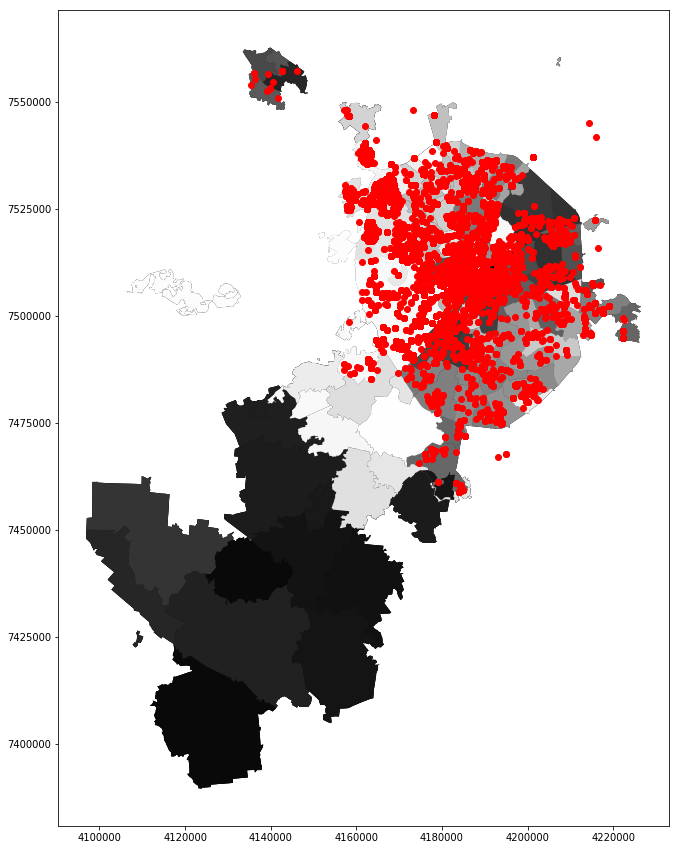

In [11]:
fig, ax = plt.subplots(figsize=[15,15])
mo_gdf.plot(ax=ax, cmap='gist_gray')
data_gdf.plot(ax = ax, color='red')

In [12]:
from sklearn.cluster import MiniBatchKMeans

In [21]:
clusters = 15

In [22]:
clst = MiniBatchKMeans(random_state=123, n_clusters=clusters)

In [23]:
clst.fit(geo_data[["x","y"]].values)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=15,
        n_init=3, random_state=123, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [24]:
point_classes = clst.predict(geo_data[["x","y"]].values)

In [25]:
collections.Counter(point_classes)

Counter({7: 9484,
         14: 8907,
         3: 9789,
         5: 15567,
         10: 5116,
         11: 3633,
         13: 1929,
         4: 11953,
         0: 2197,
         2: 9512,
         1: 12696,
         9: 5171,
         12: 2618,
         6: 2313,
         8: 7921})

In [26]:
import matplotlib.colors
cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=0, vmax=clusters-1)

In [27]:
data_gdf['class']=point_classes

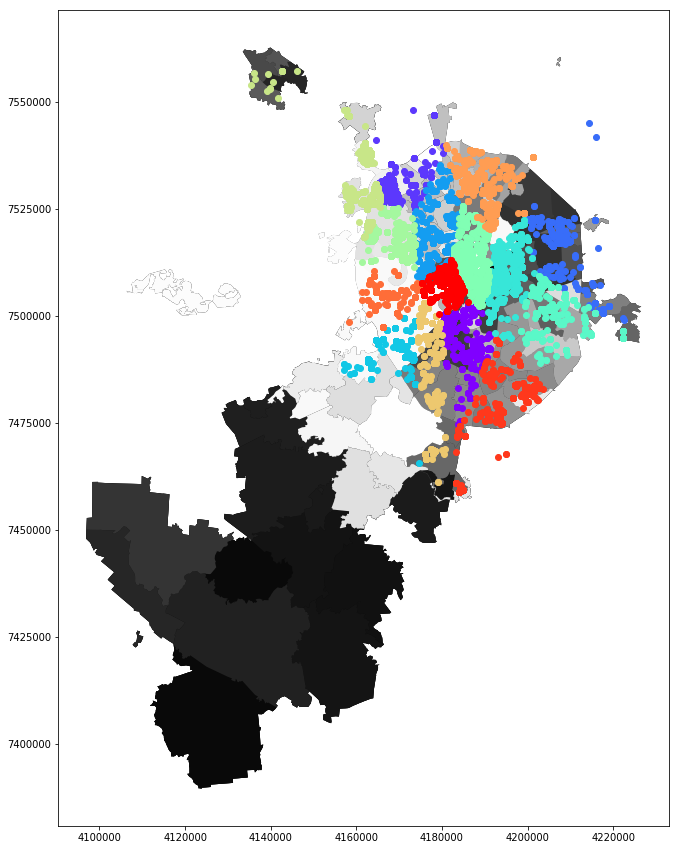

In [28]:
fig, ax = plt.subplots(figsize=[15,15])
mo_gdf.plot(ax=ax, cmap='gist_gray')
for idx, gp in data_gdf.groupby('class'):
    gp.plot(ax = ax, color=cmap(norm(idx)))

In [29]:
clst2 = MiniBatchKMeans(random_state=123, n_clusters=clusters)

In [38]:
clst2.fit(geo_data[["x","y", "comment_class"]].values)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=15,
        n_init=3, random_state=123, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [39]:
point_classes2 = clst2.predict(geo_data[["x","y", "comment_class"]].values)

In [40]:
data_gdf['class2']=point_classes2

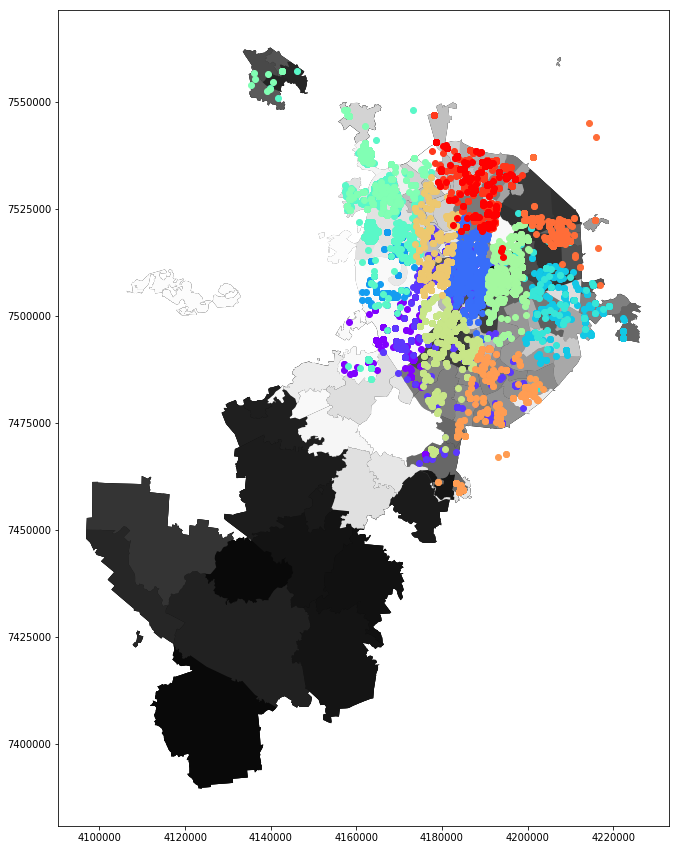

In [41]:
fig, ax = plt.subplots(figsize=[15,15])
mo_gdf.plot(ax=ax, cmap='gist_gray')
for idx, gp in data_gdf.groupby('class2'):
    gp.plot(ax = ax, color=cmap(norm(idx)))